# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
# uncomment and run the following line if using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/Customer_Personality_Segmentation.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# creating a copy of data
data = data.copy()

## **Data Overview**

In [ ]:
# checking first 10rows of data
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [ ]:
# checking the last 10 rows of data
data.tail(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,3,26,7,1,23,3,3,1,2,9,1,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,10,143,13,10,20,2,9,4,12,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [ ]:
# checking total number of rows and columns in data
data.shape

(2240, 29)

In [ ]:
# checking current age of customers
from datetime import datetime

current_year = datetime.today().year
data["age_of_customer"] = current_year - data["Year_Birth"]
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age_of_customer
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44


In [ ]:
data.shape

(2240, 30)

#### **Question 1**: What are the data types of all the columns?

In [ ]:
# checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**

- There are 2,240 observations and 30 columns in the dataset.(Originally 29, 1 added for understanding the age of customers)
- All columns have 2,240 non-null values (i.e. there are no missing values) other than Income column.
- Income column has 2,216 values.i.e 24 missing values
- 26 columns are int64, 3 are object and 1 is float64 data type.
- Dt_customers is classify as object but should be in datetime format (but for our analysis not required so no need to convert)

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [ ]:
# checking statistical summaries
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


##### **Observations:**

- Average Household income is 52,247, max is 666,666 and median is 51,381.5, it is a skewed data
- Small household size data as majority has 0 or 1 children at home
- Monthly Spending on Wines, fruits, meats, fish, mostly all show low median compared to max showed data is skewed
- Store purchases still most popular channel and seconf best is web purchases.
-  

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Income has some missing values.
# Using median to fill the data. As from the statistic summaru it shows data is skewed so median is the best option

data["Income"].fillna(data["Income"].median(), inplace=True)
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age_of_customer
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,58
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,54
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,40
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,51
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,75


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


##### **Observations:**

After filling values
- Mean income changed to 52,237 from 52,247

#### **Question 4**: Are there any duplicates in the data?

In [ ]:
# checking duplicates in the data
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2235,False
2236,False
2237,False
2238,False


In [ ]:
# checking if there is any duplicate in the dataset
data.duplicated().sum()

np.int64(0)

##### **Observations:**

- As result is 0 there is no duplicate in the data

## **Exploratory Data Analysis**

### Univariate Analysis

In [ ]:
#dropping columns not required for analysis
data.drop(columns = ['Dt_Customer','Year_Birth','ID','AcceptedCmp1', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], inplace = True, errors = 'ignore')

In [ ]:
#checking the data if drop correctly or not
data.head(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,age_of_customer
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,68
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,71
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,60
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,41
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,44
5,Master,Together,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,58
6,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,54
7,PhD,Married,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,40
8,PhD,Together,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,1,51
9,PhD,Together,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,0,0,75


#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

Income
Skewness: 6.8
Kidhome
Skewness: 0.64
Teenhome
Skewness: 0.41
Recency
Skewness: -0.0
MntWines
Skewness: 1.18
MntFruits
Skewness: 2.1
MntMeatProducts
Skewness: 2.08
MntFishProducts
Skewness: 1.92
MntSweetProducts
Skewness: 2.14
MntGoldProds
Skewness: 1.89
NumDealsPurchases
Skewness: 2.42
NumWebPurchases
Skewness: 1.38
NumCatalogPurchases
Skewness: 1.88
NumStorePurchases
Skewness: 0.7
NumWebVisitsMonth
Skewness: 0.21
Complain
Skewness: 10.19
Response
Skewness: 1.97
age_of_customer
Skewness: 0.35


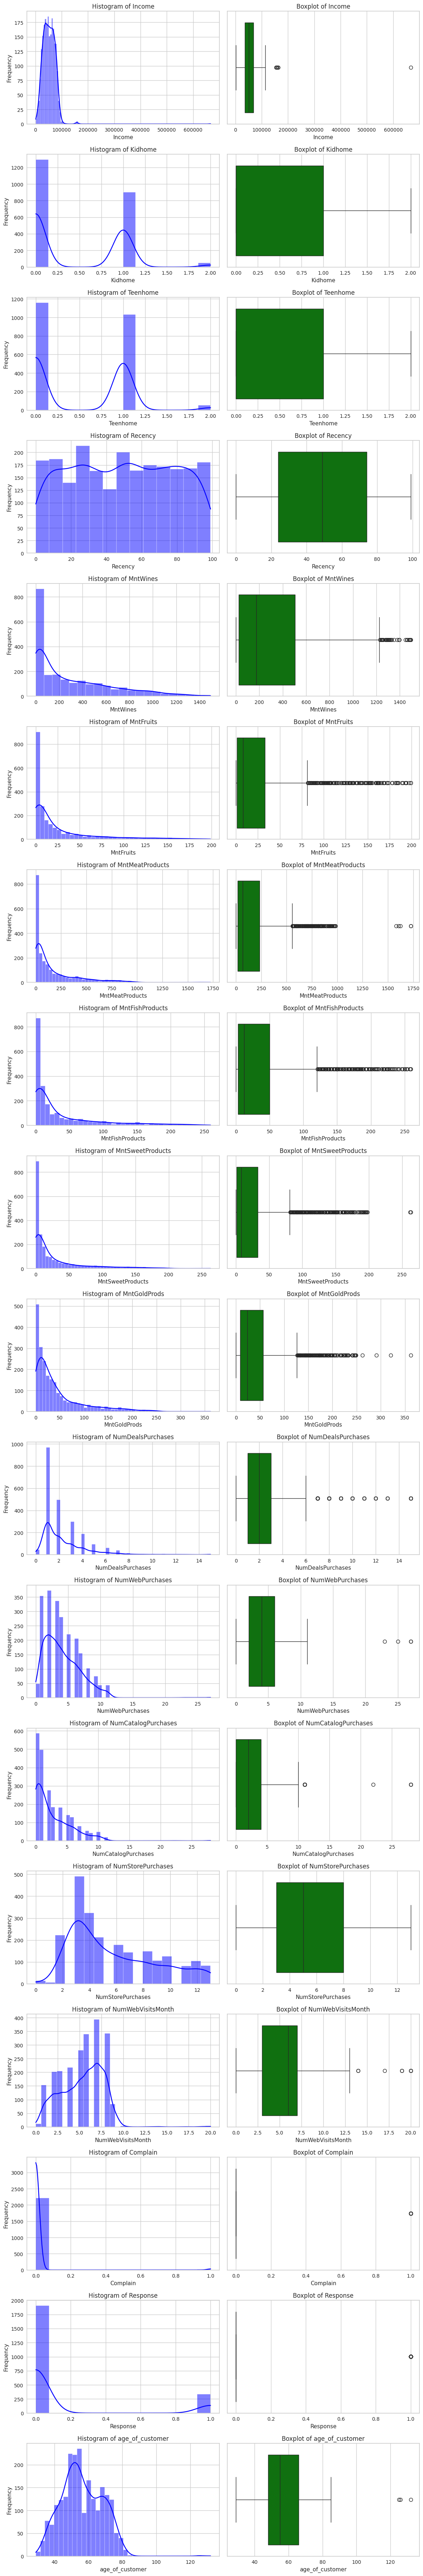

In [ ]:
# setting style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 4)

#select numerical data only
numerical_col = data.select_dtypes(include=np.number).columns

#define number of plots per row
n_cols = 2
n_rows = len(numerical_col)

plt.figure(figsize=(n_cols*6, n_rows*4))

for i, col in enumerate(numerical_col):
  skew_val = round(data[col].skew(),2)
  print(col)
  print('Skewness:',round(data[col].skew(),2))

#Histogram
  plt.subplot(n_rows, n_cols, i* 2 + 1)
  sns.histplot(data[col], kde=True, color="blue")
  plt.title(f"Histogram of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")

#Boxplot
  plt.subplot(n_rows, n_cols, i* 2 + 2)
  sns.boxplot(x=data[col], color="green")
  plt.title(f"Boxplot of {col}")
  plt.xlabel(col)

plt.tight_layout()
plt.show()

##### **Observations:**

1. Income
  - Highly right skewed distribution,
  - most income between 20,000 - 100,000,
  - many outliers above 120,000

2. Kidhome
  - Majority customer no children at home
  - Second largest have 1 child at home and some has 2
  - No outliers, median 0 showing majority dont have kids at home

3. Teenhome
  - Same observation as Kidhome

4. Recency
  - Histograms seems to be uniformly distributed, no string skew
  - No outliers, median is 50, showing range is well-balanced

5. Wine, Fruits, Meat Products, Fish Products, Sweet Products and Gold Prods
  - All have similar observations, all are highly right skewed
  - Have many outliers,
  - Most customers spend small amount, small group spends more, showing long tail

6. Deals Purchases, Web Purchases, Catalog purchases
  - Right Skewed, few outliers,
  - few customers buy from deals, web,
  - Catalog buyers are more than other 2

7. Complain, Response
  - Imbalances, mostly 1s and 0s


### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

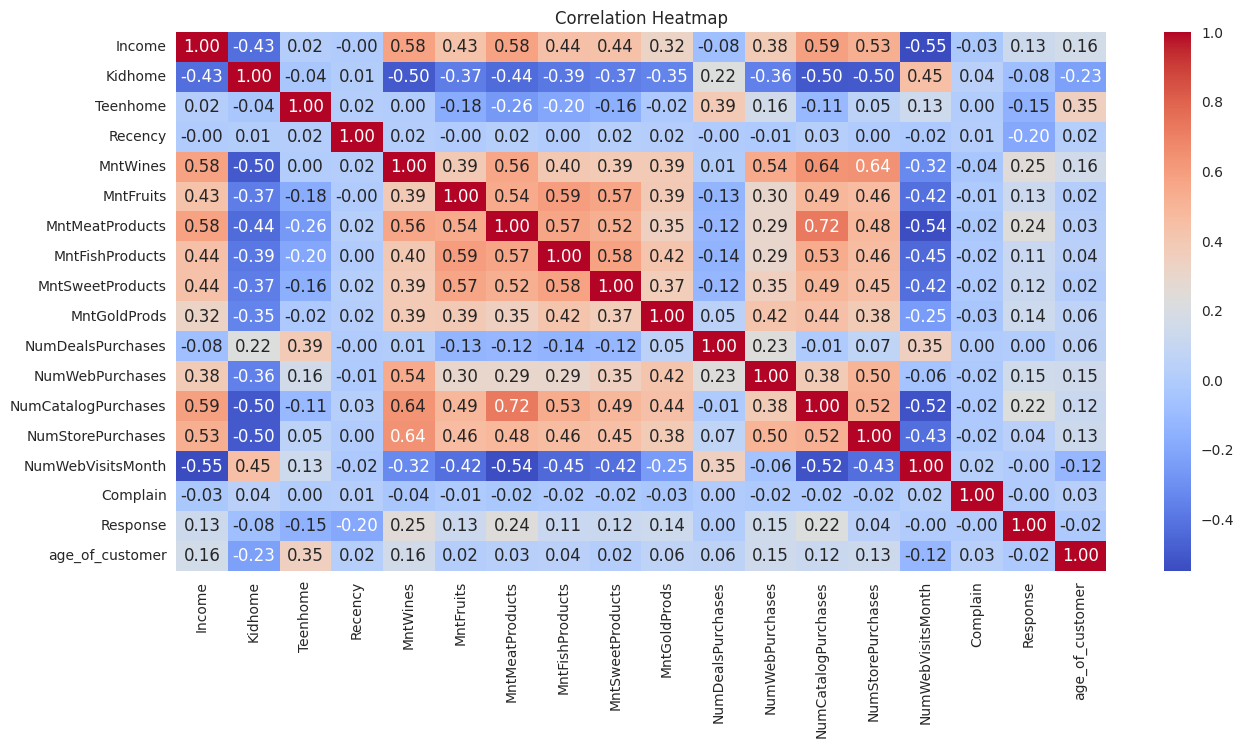

In [ ]:
# Checking correlation between the variables through Heatmap

plt.figure(figsize=(15, 7))

correlation_matrix = data.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##### **Observations:**

- Strong correlation between catalog products and high spending in  meat products, wine fish and have high income.
- Products show positive correlation with eachother, showing customers spend in 1 category tend to spend in another
- Income has positive correlation showing shop from stores and catalouge more
- Web visit month have negative correlation with Income, meatproducts, catalog purchases and positive with kidhome, deals showing less purchasing and more browsing, and mostly consumers are from low income group have kid at home.
- As webvisit , home with showing negative correlation with wine, income showing customers to be more price-conscious or less spending on premium-products

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

In [ ]:
# scaling the data before that
subset = data.select_dtypes(include=np.number)
scaler = StandardScaler()
subset_scaled = pd.DataFrame(scaler.fit_transform(subset), columns=subset.columns)

In [ ]:
subset_scaled

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,age_of_customer
0,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.097282,2.388846,0.985345
1,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.097282,-0.418612,1.235733
2,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.097282,-0.418612,0.317643
3,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.097282,-0.418612,-1.268149
4,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.097282,-0.418612,-1.017761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.358936,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766,-0.168236,1.769263,0.115638,-0.550785,-0.130463,-0.097282,-0.418612,0.150717
2236,0.470432,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659,2.420015,1.409304,-0.226541,-0.243114,0.693904,-0.097282,-0.418612,1.903435
2237,0.189476,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886,-0.685887,-0.750450,0.115638,2.218248,0.281720,-0.097282,-0.418612,-1.017761
2238,0.679401,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527,-0.168236,0.689386,0.799996,1.295237,-0.954831,-0.097282,-0.418612,1.068807


In [ ]:
#now for Question
k_means_data = subset_scaled.copy()

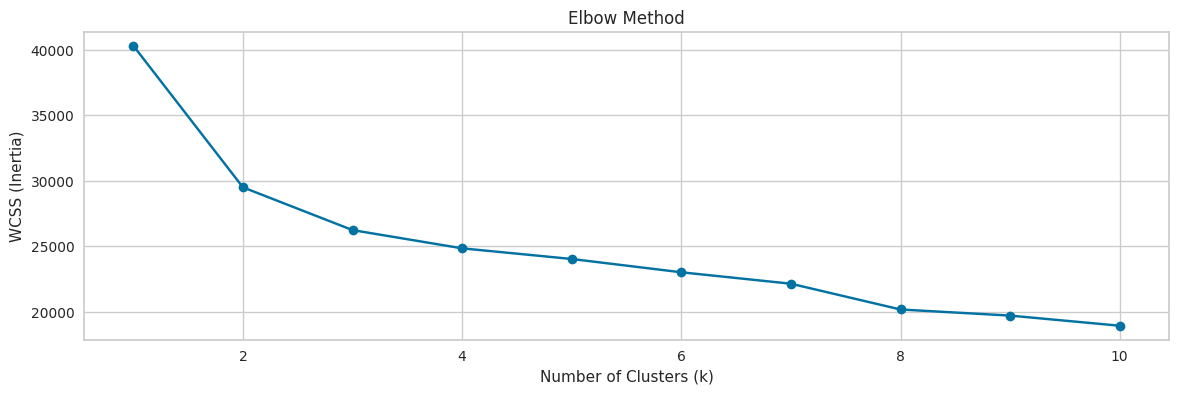

In [ ]:
#Let us now fit k-means algorithm on our scaled data and find out the optimum number of clusters to use.
#We will do this in 3 steps:
#1.Initialize a dictionary to store the SSE for each k
#2.Run for a range of Ks and store SSE for each run
#3.Plot the SSE vs K and find the elbow


wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(k_means_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method')
plt.show()

##### **Observations:**

- Appropriate number of cluster seems to be 4 (elbow point achieved)
- k-means, k=4

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

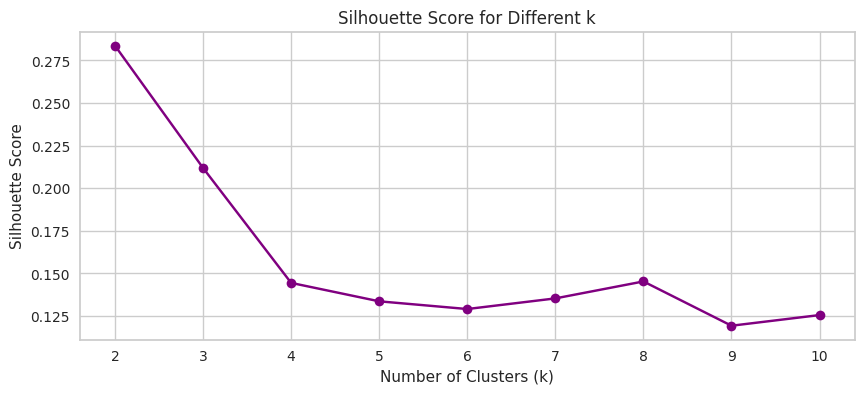

In [ ]:
# sillhoutte score

silhouette_scores = []
for k in range(2, 11):  # silhouette is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(k_means_data)
    score = silhouette_score(k_means_data, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='purple')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

##### **Observations:**

In [ ]:
- Score is 2 which is different from Elbow i.e.4
- But better to take 4.

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [ ]:
# With elbow result

%%time
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(k_means_data)

CPU times: user 6.85 ms, sys: 0 ns, total: 6.85 ms
Wall time: 6.61 ms


KMeans(n_clusters=4, random_state=0)

In [ ]:
#with sillhoute result

%%time
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(k_means_data)

CPU times: user 6.72 ms, sys: 77 µs, total: 6.8 ms
Wall time: 6.68 ms


KMeans(n_clusters=2, random_state=0)

##### **Observations:**

Better to proceed with 4

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

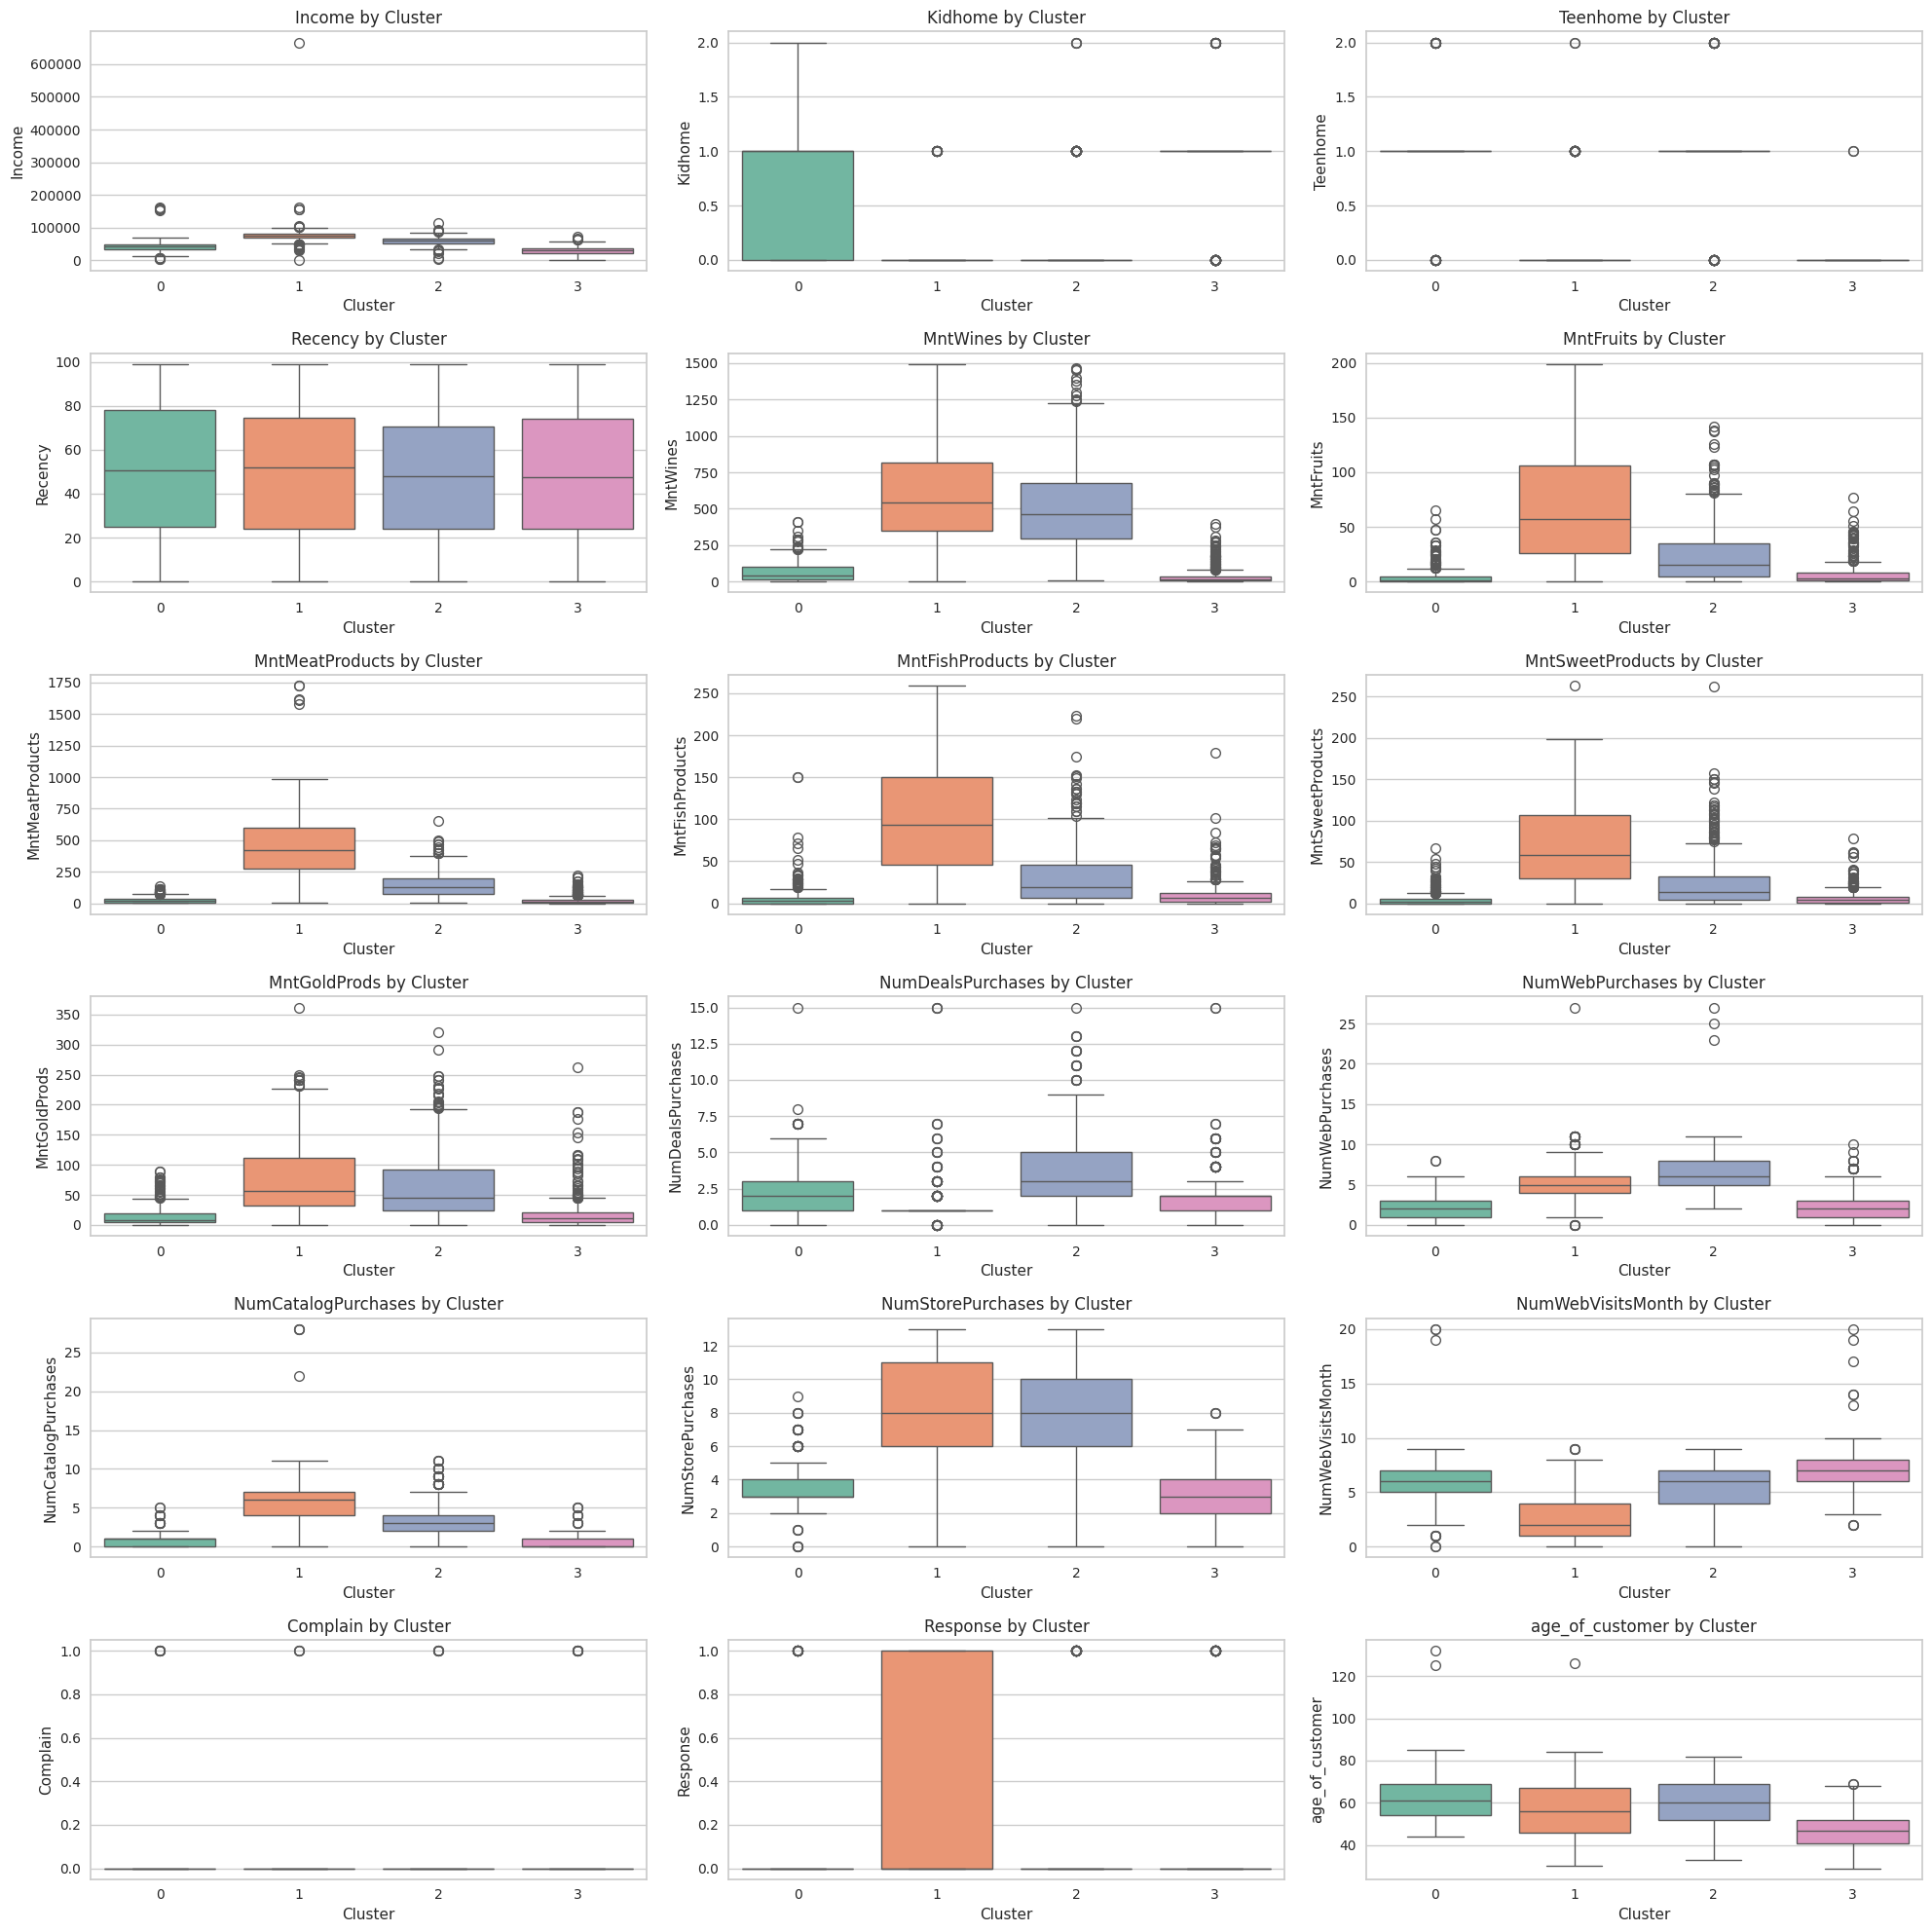

In [ ]:
# Write your code here
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(k_means_data)

data['Cluster'] = kmeans.labels_

numerical_cols = data.select_dtypes(include='number').columns.drop('Cluster')
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20,20))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(data=data, x='Cluster', y=col, palette='Set2')
    plt.title(f"{col} by Cluster")

plt.tight_layout()
plt.show()

##### **Observations:**

Cluster 0 -
- Lower income compare to others, families with children and teen, budget conscious group, benefit from deals and discounts

Cluster 1 -
- Highest income among dataset, active in all channels and spend highest in all purchasing categories, purchased frequently, premium cutsomers and response well to campaigns

Cluster 2 -
- second highest income, high in meat and wine, but purchases second to cluster 1, not that responsive to campaigns but highest in using discounts, have higher response on web even more than cluster 1

Cluster 3 -
- Lowest income after cluster 0, high elderly customers, not that responsive not high purchases.

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

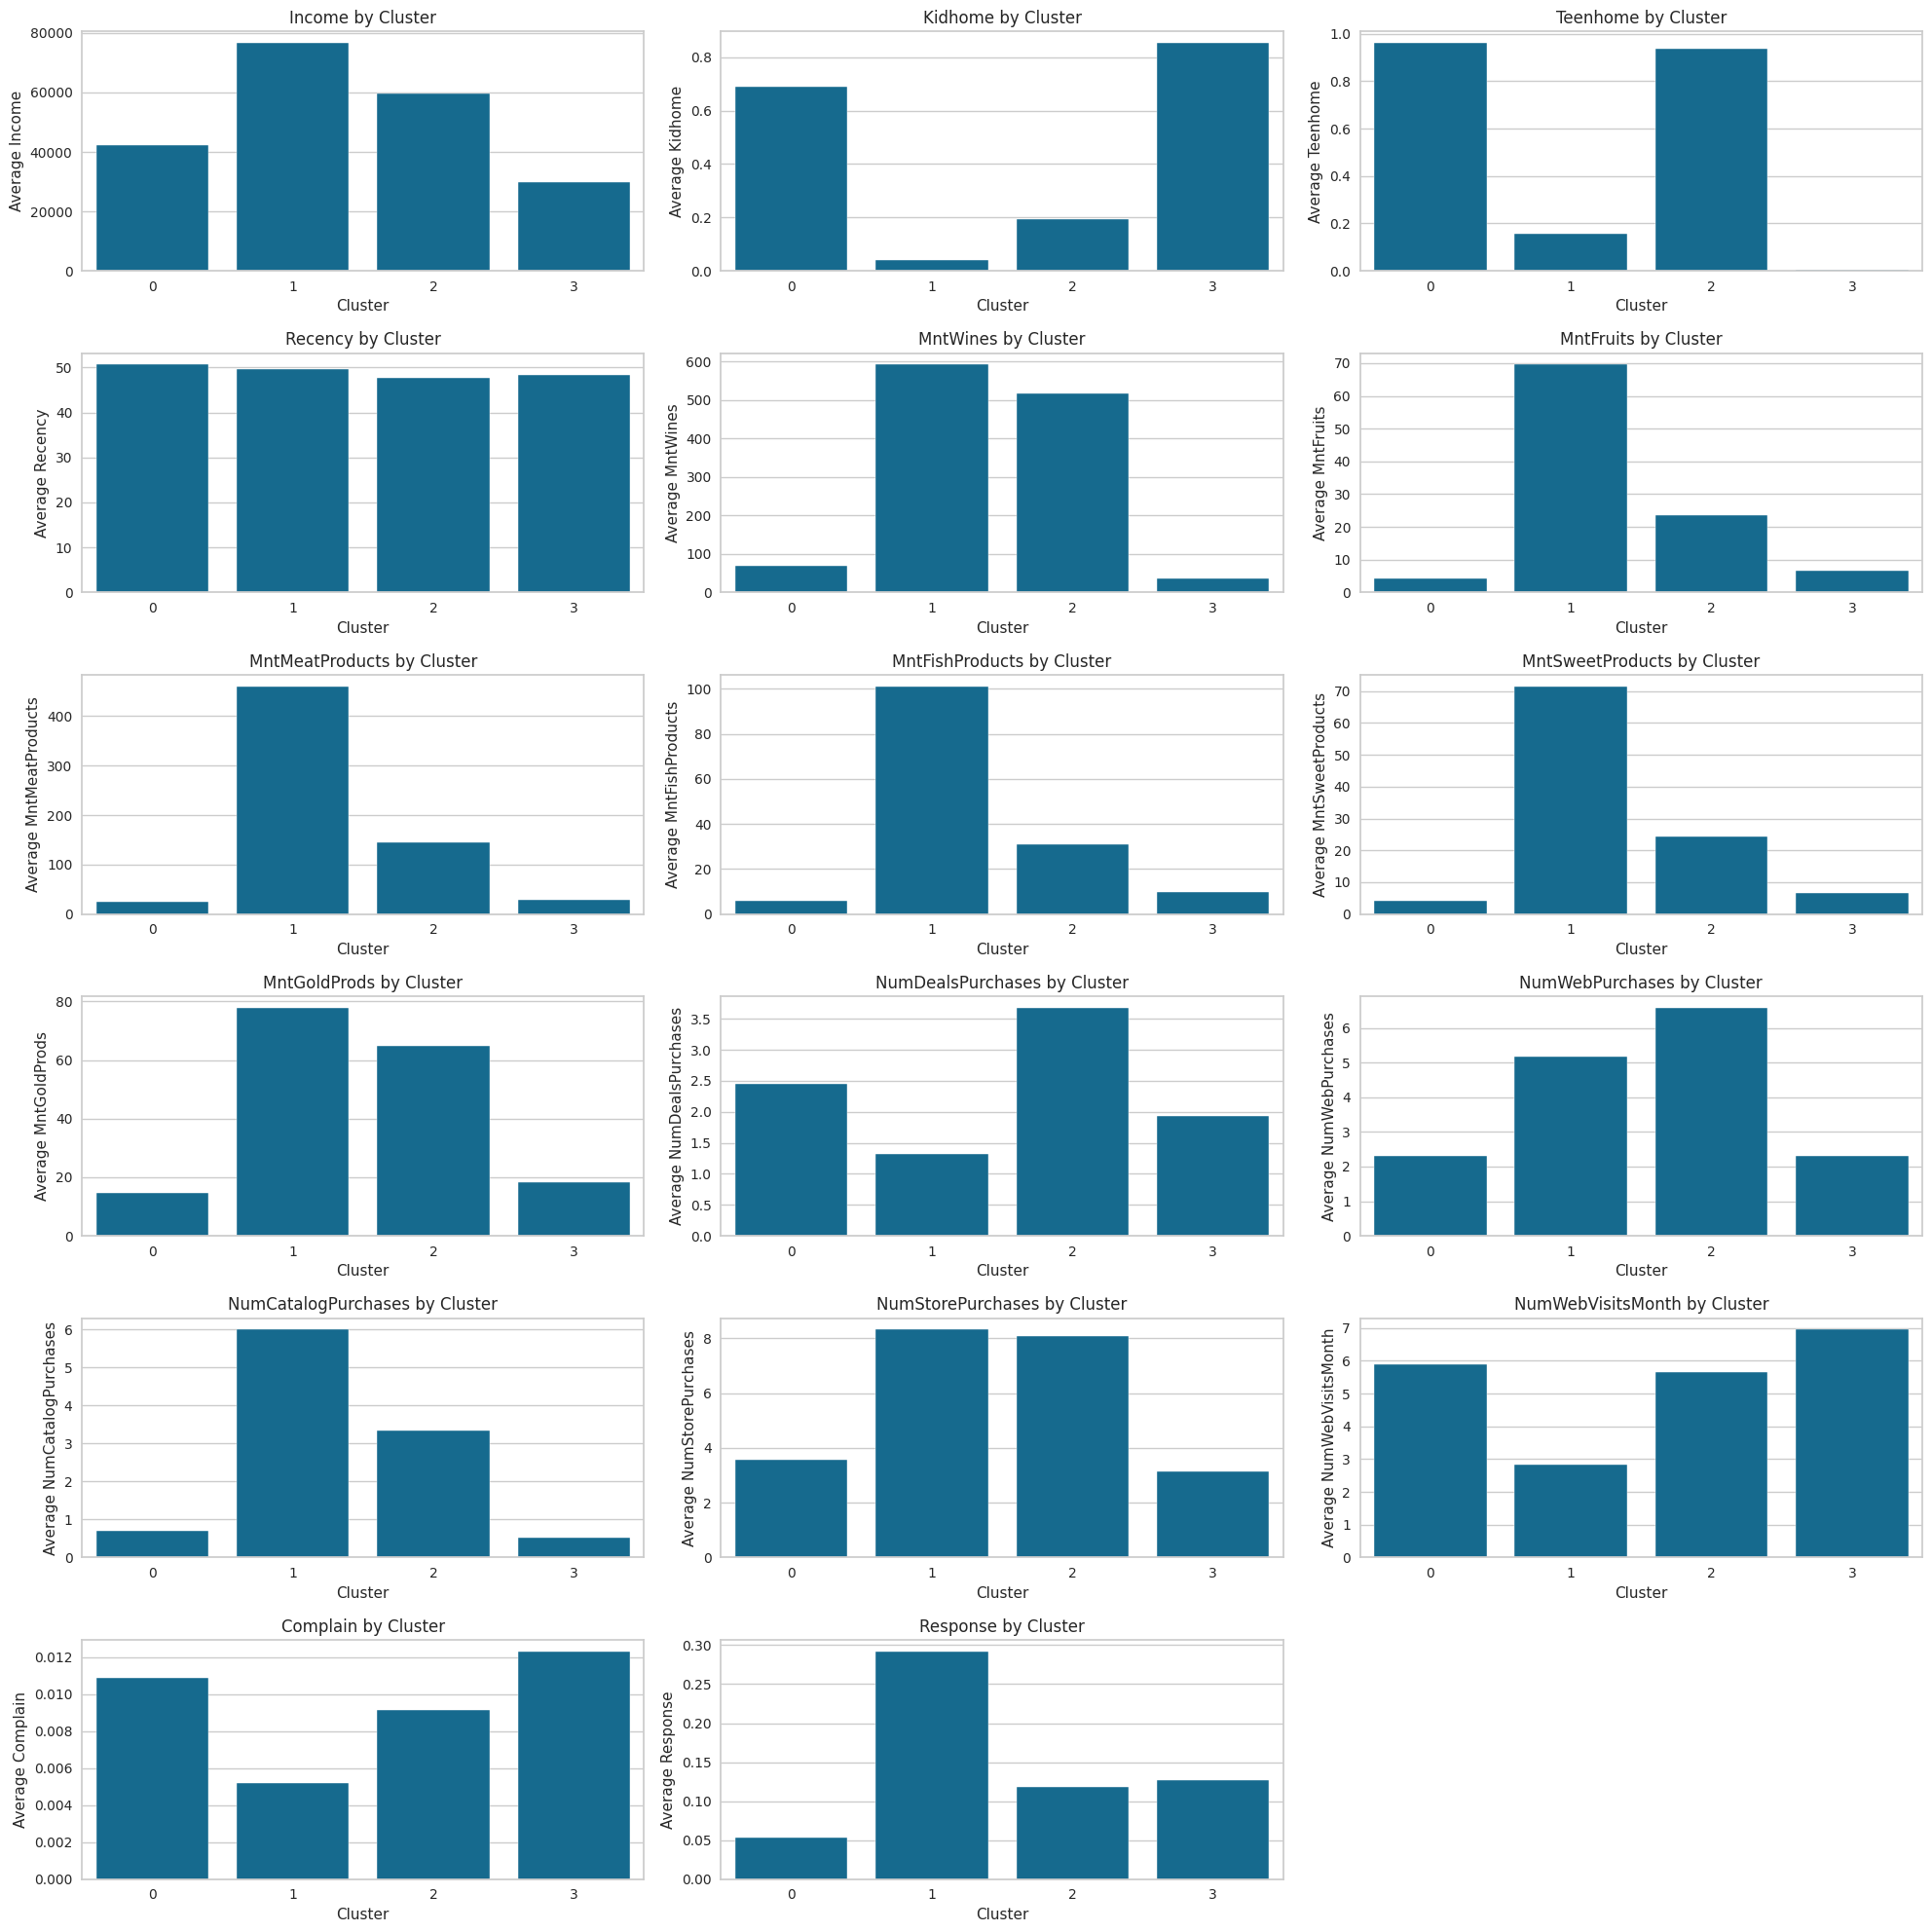

In [ ]:
# Write your code here
profile_data = data.select_dtypes(include='number').copy()
profile_data['Cluster'] = kmeans.labels_

cluster_profile = profile_data.groupby('Cluster').mean()

plt.figure(figsize=(20, 20))
for i, column in enumerate(cluster_profile.columns[:-1], 1):
    plt.subplot(6, 3, i)
    sns.barplot(x=cluster_profile.index, y=cluster_profile[column])
    plt.title(f'{column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {column}')
    plt.tight_layout()

plt.show()

##### **Observations:**

Observations are very similar to observations through boxplot
- Focus on retention and premium campaigns for Cluster 1
- Tailor digital and multi-platform startegies for Cluster 2
- Cost-effective, conversion driven campaigns for cluster 3


## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

Cluster 0 -
- Low income group, low spending and weak marketing response
- Offer value packs and discounts to suit budget- conscious families
- Avoid heavy marketing spend on these customers

Cluster 1 -
- High Income group, highest spending and high marketing response
- Provide exclusive offer, premium campaigns,
- Premium experience, invite to brand events

Cluster 2 -
- Second highest income group, moderate to high spending, good response to campaigns
- Highest web purchases, provide online discount deals and digital wallet payment options with points
- promote mid-range products, budget friendly plus slight premium

Cluster 3 -
- Second lowest income, low spending, but high online engagement
- online exclusive offers to encourage purchases,
- study online patterns to undersatnd preferences and offer trial packs for the same